In [1]:
from preprocess.arpit_v2 import *
from preprocess.preprocess_v2 import *
from preprocess.preprocess_v2 import preprocess
import os
import inspect
import time
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
from models.LDA_multi_level import lda_model_multi_level
from models.LDA_single_level import lda_model_single_level
from models.lda_mallet import lda_mallet
print('------------------------------------------------------')
print('- Imports Done')

------------------------------------------------------
- Imports Done


## LDA on gold_standard.csv - Title 

In [2]:
data_file_string = 'gold_standard.csv'
data_file = os.path.join(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))),'data',data_file_string)
gold_standard = pd.read_csv(data_file)

print(gold_standard['class'].value_counts())
print('---')
print(gold_standard['month'].value_counts())

positive    208
Name: class, dtype: int64
---
12    79
10    46
11    43
9     20
8     20
Name: month, dtype: int64


In [3]:
gold_standard.head()

,ids,month,class,title
0,2055,8,positive,News Alert! Maratha Reservation: Bicycles set ...
1,5909,8,positive,"Post-rains, plantation sector tots up losses"
2,2525,8,positive,Can't free Rajiv Gandhi's killers: Indian Govt...
3,3175,8,positive,Organic farming policy on the anvil
4,1164,8,positive,MP: 3 detained after 10 dead cows found in aba...


In [4]:
raw_docs = gold_standard['title'].values

In [5]:
type(raw_docs)

numpy.ndarray

In [6]:
# DATA
# Note that raw docs is a numpy array. 
# Example element is: 
# 'Logical Disk Free Space is low, Description: The disk C: on computer sjcphxstg02.strykercorp.com is running out of disk space. The values that exceeded the thre'
# data_file_string = 'short_description.pkl'

# data_file_string = 'gold_standard.csv'
# data_file = os.path.join(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))),'data',data_file_string)
# raw_docs = pickle.load(open(data_file,'rb'))

print('- Imported Data')

- Imported Data


In [7]:
# PRE-PROCESSING
preprocess_steps_and_order = {
	'make_lowercase': [True],
	'punctuation_removal':[True],
	'whitespace_removal': [True],
	'store_alphanumeric': [False],
	'pos_removal_nltk': [True, {'pos_removal_nltk_list':['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',  'PRP','PRP$',  'RB','RBR','RBS','RP',  'JJ','JJR','JJS',   'CC','DT','EX','IN',   'WDT','WP','WP$','WRB']}],
	'tokenization_nltk': [False],
	'lemmatization_tokenization_spacy': [True],
	'stopwords_removal_nltk': [True],
	'stopwords_removal_spacy': [False],
	'make_bigrams_gensim':[True, {'make_bigrams_gensim': True, 'bigrams_min_count': 10, 'bigrams_threshold': 10}],
	'make_trigrams_gensim':[True, {'make_trigrams_gensim': True, 'trigrams_min_count': 10, 'trigrams_threshold': 10}],
	'min_max_length_removal':[False, {'min_max_length_removal': False, 'mmlr_min_len': 3, 'mmlr_max_len': 50, 'mmlr_deacc': False}]
	}

preprocess_functions = {
	'make_lowercase': make_lowercase,
	'punctuation_removal': punctuation_removal,
	'whitespace_removal': whitespace_removal,
	'store_alphanumeric': store_alphanumeric,
	'pos_removal_nltk': pos_removal_nltk,
	'tokenization_nltk': tokenization_nltk,
	'lemmatization_tokenization_spacy': lemmatization_tokenization_spacy,
	'stopwords_removal_nltk': stopwords_removal_nltk,
	'stopwords_removal_spacy': stopwords_removal_spacy,
	'make_bigrams_gensim': make_bigrams_gensim,
	'make_trigrams_gensim': make_trigrams_gensim,
	'min_max_length_removal': min_max_length_removal
	}

In [8]:
# MODELS
models_dict = {
	'LDA_single_level': lda_model_single_level,
	'LDA_multi_level': lda_model_multi_level,
}

In [9]:
# SPECIFICATIONS

num_topics_list_level_1 = np.arange(1,51,1).tolist()

specifications = {
	# 'model':'LDA_single_level', # Can be LDA_multi_level
	'level':2,
	'num_topics_list_level_1':num_topics_list_level_1,
	'num_topics_list_level_2':[3,5,8,11],
	'num_topics_list_level_3':[1,2,3,4,5],
	'coherence':'c_v',
	'need_best_topic': True,
	'model_selection_metric':'coherence', # or 'perplexity',
	'debug':False,
    'sample_to_print':1,
#     'pos_removal_spacy_list':['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE'],
}

In [10]:
print('*****************************************************')
print('- Starting preprocessing')
dictionary, corpus, doc_list = preprocess(
								raw_docs = raw_docs, 
								preprocess_functions = preprocess_functions, 
								preprocess_steps_and_order = preprocess_steps_and_order, 
								debug=specifications['debug'])

*****************************************************
- Starting preprocessing

       ##### Lowercasing Done! Time Taken -  0.00011610984802246094

       ##### Punctuation removed! Time Taken -  0.0010190010070800781

       ##### Whitespace removed! Time Taken -  0.00031495094299316406

       ##### POS Removal Done! Time Taken -  0.23259401321411133

       ##### Lemmatization and Tokenization Done using Spacy! Time Taken -  1.3099360466003418

       ##### Stopwords Removed using NLTK! Time Taken -  0.001188039779663086

       ##### Bi-Grams made using Gensim! Time Taken -  0.006632089614868164

       ##### Tri-Grams made using Gensim! Time Taken -  0.006642818450927734
~~~ pre-processing done in  1.5597407817840576
 
- Creating dictionary and corpus


### LDA Single Level

In [11]:
print('*****************************************************')
print('- Starting model training')
lda_dict = lda_model_single_level(
					dictionary = dictionary,
					corpus = corpus,
					doc_list = doc_list,
					num_topics_list_level_1 = specifications['num_topics_list_level_1'], 
					coherence = specifications['coherence'],
					debug = specifications['debug'],
					need_best_topic = specifications['need_best_topic'],
					model_selection_metric = specifications['model_selection_metric']
					)

*****************************************************
- Starting model training
 
Sample data point:  ['news', 'alert', 'maratha', 'reservation', 'bicycle', 'protester', 'pune', '’s', 'kothrud']
 
	### Running LDA for number of topic - 1
	LDA Done for 1 topic! Time Taken is 0.15054774284362793
	Evaluating model for number of topic - 1
Coherence - 0.6746121300898292, Perplexity - -6.633473351237538
---
	### Running LDA for number of topic - 2
	LDA Done for 2 topic! Time Taken is 0.4733710289001465
	Evaluating model for number of topic - 2
Coherence - 0.5178613841689278, Perplexity - -6.841806142719892
---
	### Running LDA for number of topic - 3
	LDA Done for 3 topic! Time Taken is 0.3772118091583252
	Evaluating model for number of topic - 3
Coherence - 0.4979464657135762, Perplexity - -6.897830845792215
---
	### Running LDA for number of topic - 4
	LDA Done for 4 topic! Time Taken is 0.30211496353149414
	Evaluating model for number of topic - 4
Coherence - 0.5784845394167322, Perplexit

	LDA Done for 39 topic! Time Taken is 0.3112952709197998
	Evaluating model for number of topic - 39
Coherence - 0.5260063180780408, Perplexity - -20.123507689078757
---
	### Running LDA for number of topic - 40
	LDA Done for 40 topic! Time Taken is 0.30669617652893066
	Evaluating model for number of topic - 40
Coherence - 0.5286939970156268, Perplexity - -20.390130445590387
---
	### Running LDA for number of topic - 41
	LDA Done for 41 topic! Time Taken is 0.31441617012023926
	Evaluating model for number of topic - 41
Coherence - 0.526698658064005, Perplexity - -20.820438712082066
---
	### Running LDA for number of topic - 42
	LDA Done for 42 topic! Time Taken is 0.32909202575683594
	Evaluating model for number of topic - 42
Coherence - 0.5364530777310613, Perplexity - -20.921723481554253
---
	### Running LDA for number of topic - 43
	LDA Done for 43 topic! Time Taken is 0.3390769958496094
	Evaluating model for number of topic - 43
Coherence - 0.5389453311094135, Perplexity - -21.79137

In [12]:
print('Best Topic',lda_dict['best_topic'])

Best Topic 1


<Figure size 864x864 with 0 Axes>

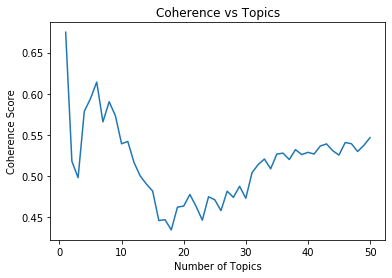

<Figure size 864x864 with 0 Axes>

In [13]:
plt.plot(num_topics_list_level_1, lda_dict['coherence_score_list'])
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence vs Topics')
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

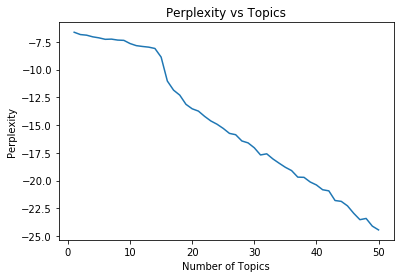

<Figure size 864x864 with 0 Axes>

In [14]:
plt.plot(num_topics_list_level_1, lda_dict['perplexity_score_list'])
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Topics')
plt.figure(figsize=(12,12))

In [16]:
pyLDAvis.enable_notebook()
topic_to_show = 6
visualization = pyLDAvis.gensim.prepare(lda_dict['all_models'][topic_to_show], lda_dict['corpus'], lda_dict['dictionary'])
# pyLDAvis.save_html(visualization, 'lda_10.html')
visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.114255  0.054124       1        1  25.240410
0      0.071439 -0.225082       2        1  21.842049
2      0.232480  0.113542       3        1  14.310525
3     -0.048739 -0.000696       4        1  13.216758
1     -0.076697  0.034807       5        1  12.942335
5     -0.064228  0.023304       6        1  12.447930, topic_info=    Category       Freq         Term      Total  loglift  logprob
26   Default  13.000000        india  13.000000  30.0000  30.0000
36   Default  10.000000         land  10.000000  29.0000  29.0000
130  Default   9.000000  maharashtra   9.000000  28.0000  28.0000
85   Default   9.000000  acquisition   9.000000  27.0000  27.0000
35   Default  14.000000     violence  14.000000  26.0000  26.0000
..       ...        ...          ...        ...      ...      ...
29    Topic6   0.809691        state   2.267941   1.0536  -4.9409
8     Topic6   0.687496           ’s   1.791721   1.1257  -5.1045
347   Topic6   0.517735         hole   1.603372   0.9532  -5.3881
349   Topic6   0.517707          rat   2.153145   0.6583  -5.3882
315   Topic6   0.517486       mumbai   2.153369   0.6578  -5.3886

[252 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
85        5  0.972591  acquisition
200       6  0.583794       action
283       2  0.750579    agitation
486       4  0.594989       aiadmk
513       2  0.892646      airlift
...     ...       ...          ...
53        4  0.551540        woman
145       2  0.617874       worker
153       1  0.634017         year
73        2  0.770068            ’
8         6  0.558123           ’s

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2, 6])

In [17]:
def get_topics(lda_model):
	topics = lda_model.print_topics()
	print("~~~ Topics are:")
	for i in range(len(topics)):
		print('Topic ',i)
		print(topics[i][1])
		print(' ')

In [18]:
get_topics(lda_dict['all_models'][topic_to_show])

~~~ Topics are:
Topic  0
0.050*"mine" + 0.042*"encroachment" + 0.041*"meghalaya" + 0.040*"resident" + 0.039*"miner" + 0.039*"tragedy" + 0.039*"diver" + 0.038*"debt" + 0.037*"effort" + 0.037*"airlift"
 
Topic  1
0.082*"land" + 0.074*"acquisition" + 0.073*"government" + 0.067*"court" + 0.022*"march" + 0.016*"cm" + 0.013*"protest" + 0.012*"gujarat" + 0.010*"tamil" + 0.010*"demand"
 
Topic  2
0.099*"india" + 0.045*"coal" + 0.043*"miner" + 0.041*"leopard" + 0.040*"body" + 0.040*"highway" + 0.039*"monk" + 0.037*"forest" + 0.037*"effort" + 0.037*"serviceman"
 
Topic  3
0.030*"crisis" + 0.019*"water" + 0.017*"dam" + 0.015*"govt" + 0.014*"cauvery" + 0.013*"protest" + 0.012*"farm" + 0.010*"aiadmk" + 0.010*"construction" + 0.009*"session"
 
Topic  4
0.062*"violence" + 0.053*"slaughter" + 0.045*"team" + 0.045*"onion" + 0.018*"cow" + 0.015*"day" + 0.015*"bulandshahr" + 0.012*"man" + 0.010*"death" + 0.009*"bjp"
 
Topic  5
0.076*"maharashtra" + 0.073*"issue" + 0.066*"ride" + 0.021*"centre" + 0.011*"p

### LDA Multi-Level

In [18]:
# print('*****************************************************')
# print('- Starting model training')
# lda_level_1, lda_level_2 = lda_model_multi_level(
# 					level = specifications['level'],
# 					dictionary = dictionary,
# 					corpus = corpus,
# 					doc_list = doc_list,
# 					coherence = specifications['coherence'],
# 					debug = specifications['debug'],
# 					need_best_topic = specifications['need_best_topic'],
# 					model_selection_metric = specifications['model_selection_metric'],
# 					num_topics_list_level_1 = specifications['num_topics_list_level_1'], 
# 					num_topics_list_level_2 = specifications['num_topics_list_level_2'], 
# 					)

### Mallet LDA

In [ ]:
# print('*****************************************************')
# print('- Starting model training')
# lda_dict = lda_mallet(
# 					dictionary = dictionary,
# 					corpus = corpus,
# 					doc_list = doc_list,
# 					num_topics_list_level_1 = specifications['num_topics_list_level_1'], 
# 					coherence = specifications['coherence'],
# 					debug = specifications['debug'],
# 					need_best_topic = specifications['need_best_topic'],
# 					model_selection_metric = specifications['model_selection_metric']
# 					)

## Visualization

### What is the Dominant topic and its percentage contribution in each document

In [23]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=doc_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [29]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_dict['all_models'][topic_to_show], corpus=corpus, texts=doc_list)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.9428,"maharashtra, issue, ride, centre, project, riv...","[news, alert, maratha, reservation, bicycle, p..."
1,1,0.0,0.9153,"mine, encroachment, meghalaya, resident, miner...","[post, rain, plantation, sector, loss]"
2,2,3.0,0.8755,"crisis, water, dam, govt, cauvery, protest, fa...","[rajiv, gandhi, killer, govt]"
3,3,2.0,0.5881,"india, coal, miner, leopard, body, highway, mo...","[farm, policy, anvil]"
4,4,4.0,0.8649,"violence, slaughter, team, onion, cow, day, bu...","[cow, abattoir, khandwa]"
5,5,2.0,0.9368,"india, coal, miner, leopard, body, highway, mo...","[india, state, kerala, alert, flood, kill, dozen]"
6,6,0.0,0.8970,"mine, encroachment, meghalaya, resident, miner...","[parrikar, modi, ’s, goa]"
7,7,3.0,0.7197,"crisis, water, dam, govt, cauvery, protest, fa...","[bandh, violence, protest, maratha, reservation]"
8,8,3.0,0.5642,"crisis, water, dam, govt, cauvery, protest, fa...","[panel, land, scam]"
9,9,0.0,0.8970,"mine, encroachment, meghalaya, resident, miner...","[hindus, encroachment, cremation, site]"


### The most representative sentence for each topic

In [30]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9505,"mine, encroachment, meghalaya, resident, miner, tragedy, diver, debt, effort, airlift","[meghalaya, mine, tragedy, diver, airlift, pump, effort, miner, incident]"
1,1.0,0.9269,"land, acquisition, government, court, march, cm, protest, gujarat, tamil, demand","[tamil, government, land, acquisition, law, court, order]"
2,2.0,0.9368,"india, coal, miner, leopard, body, highway, monk, forest, effort, serviceman","[india, state, kerala, alert, flood, kill, dozen]"
3,3.0,0.9505,"crisis, water, dam, govt, cauvery, protest, farm, aiadmk, construction, session","[shah, mehmood, meet, bank, stress, arbitration, resolution, indo, pak, water, dispute]"
4,4.0,0.9491,"violence, slaughter, team, onion, cow, day, bulandshahr, man, death, bjp","[man, bait, man, eater, goat, dept, official, cage, cat]"
5,5.0,0.9428,"maharashtra, issue, ride, centre, project, river, capital, rs, parliament, train","[news, alert, maratha, reservation, bicycle, protester, pune, ’s, kothrud]"
